# XGB Regression Model Prediction

#           

   The necesarily libries:

In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [25]:
data = pd.read_csv('encoded2.csv')

In [26]:
data

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
0,84,2014.0,27000,2,0,1,0,3.35
1,87,2013.0,43000,1,0,1,0,4.75
2,66,2017.0,6900,2,0,1,0,7.25
3,90,2011.0,5200,2,0,1,0,2.85
4,86,2014.0,42450,1,0,1,0,4.60
...,...,...,...,...,...,...,...,...
251,67,2010.0,38000,2,0,1,0,3.25
252,63,2014.0,33019,2,0,1,0,3.75
253,67,2015.0,60076,1,0,1,0,8.55
254,65,2015.0,60000,2,0,1,0,4.00


   Defining the independent variables and dependent variable:

In [27]:
y=data.selling_price
X=data.drop(columns=['selling_price'])

Splitting the dataset into training and testing data:

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)

Running and fitting the model:

In [29]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb1 = XGBRegressor()
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,
         y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   16.4s finished


[11:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_chil

Model Accuracy Score:

In [30]:
xgb_grid.score(X_test, y_test)

0.9376843371342254

#### As it shown, the accoracy of the model is 94%

Comparing the predicted and actual values in table and graph:

In [31]:
y_predict= xgb_grid.predict(X_test)
df= pd.DataFrame(data={'prediction' : y_predict[:20], 'actual' : y_test[:20]})
df

,prediction,actual
39,5.560264,5.85
103,0.723360,0.75
253,8.068770,8.55
166,0.545619,0.16
80,1.173270,1.20
194,5.575071,6.15
173,6.438384,5.75
223,4.321975,4.00
96,0.558016,0.90
207,5.450401,5.20


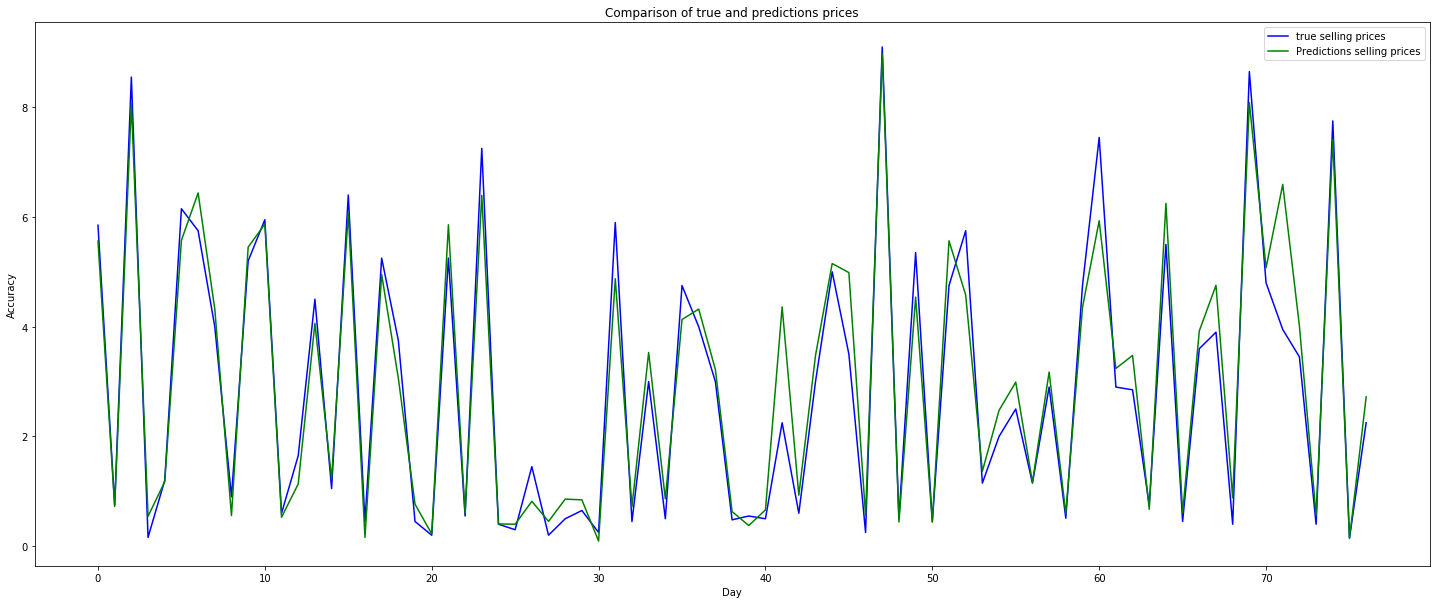

In [32]:
pred=xgb_grid.predict(X_test)
a=pd.DataFrame()
a['true_selling_prices']=y_test
a['predicted_selling_prices']=pred

plt.figure(figsize=(25, 10))
plt.subplot(1,1,1)
plt.plot(a.true_selling_prices.values,color='blue',label='true selling prices')
plt.plot(a.predicted_selling_prices.values,color='green',label='Predictions selling prices')

plt.title('Comparison of true and predictions prices')
plt.xlabel('Day')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()